In [101]:
import numpy as np
import pandas as pd

In [102]:
df=pd.read_csv("placement.csv")

In [103]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [104]:
df.shape

(100, 3)

### 1. Preprocessing + EDA + Feature Selection

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


##### Handling Datatypes

In [106]:
df['cgpa'] = df['cgpa'].astype(str).str.replace(',', '.').astype(float)


In [107]:
df

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No
...,...,...,...
95,4.3,200.0,No
96,4.4,42.0,No
97,6.7,182.0,Yes
98,6.3,103.0,Yes


##### For Null

In [108]:
df.isnull().sum() # For null rows


cgpa         5
iq           0
placement    0
dtype: int64

In [109]:
df=df.dropna(subset=["cgpa"]) # removing null

In [110]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [111]:
df

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No
...,...,...,...
95,4.3,200.0,No
96,4.4,42.0,No
97,6.7,182.0,Yes
98,6.3,103.0,Yes


##### Handling Placement column

In [112]:
df.loc[df['placement']=="Yes","placement"]=1
df.loc[df['placement']=="No","placement"]=0



In [113]:
df['placement'] = df['placement'].astype(int)
df['placement']

C:\Users\Admin\AppData\Local\Temp\ipykernel_17952\974202301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['placement'] = df['placement'].astype(int)


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 95, dtype: int32

##### For EDA

In [114]:
import matplotlib.pyplot as plt

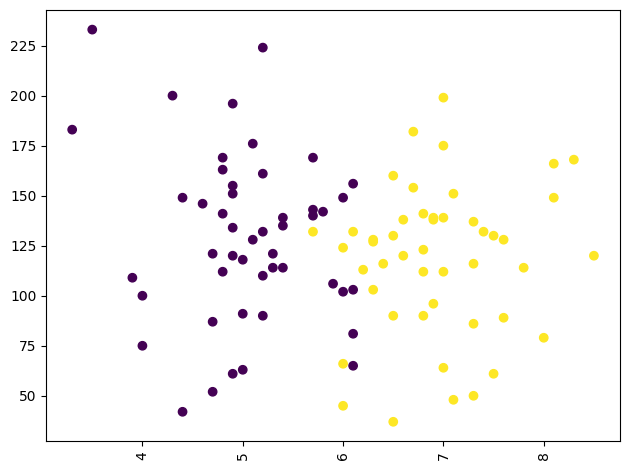

In [115]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xticks(rotation=90)
plt.tight_layout()  

##### feature Selection

### 2. Extract Input and Output Columns

In [116]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
x
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 95, dtype: int32

### 3.  Train-Test-Split

In [117]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train
# x_test
# y_train
# y_test

,cgpa,iq
73,4.9,61.0
31,3.9,109.0
99,6.2,113.0
25,5.0,91.0
41,5.4,114.0
...,...,...
90,7.3,86.0
88,4.4,149.0
26,7.0,199.0
56,6.1,65.0


###  4. Scale the Values

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)


In [119]:
x_test=scaler.transform(x_test)


### 5. Train the Model

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
clf=LogisticRegression()

In [122]:
clf.fit(x_train,y_train)

LogisticRegression()

### 6. Evaluate the Model

In [127]:
y_pred=clf.predict(x_test)

In [124]:
y_test

40    0
49    0
2     0
44    1
17    0
92    0
0     1
97    1
61    1
65    1
76    0
63    1
11    1
33    0
4     0
96    0
7     0
86    0
50    0
Name: placement, dtype: int32

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

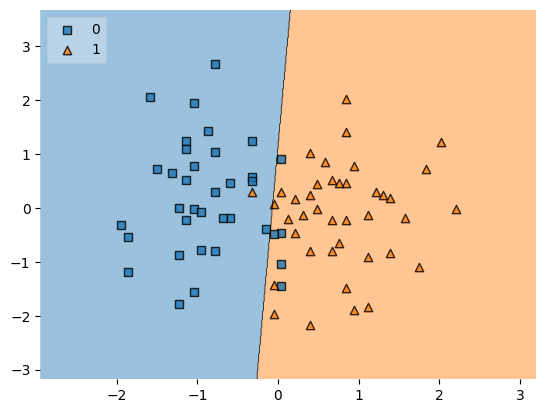

In [133]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [134]:
import pickle

In [ ]:
pickle.dump(clf,)